In [ ]:
!pip install nltk

/home/avinash/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/avinash/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [ ]:
text="""The nervous system and brain function do not often associate with infectious diseases, but numerous infectious agents affect the brain and peripheral neurons in deleterious ways. Infectious agents often behave differently in the brain than in the circulation or other organs, complicating matters for scientists working to stop neurotropic infectious diseases."""

In [ ]:
text

'The nervous system and brain function do not often associate with infectious diseases, but numerous infectious agents affect the brain and peripheral neurons in deleterious ways. Infectious agents often behave differently in the brain than in the circulation or other organs, complicating matters for scientists working to stop neurotropic infectious diseases.'

## Normalize: Lowercase

In [ ]:
text=text.lower()

In [ ]:
text

'the nervous system and brain function do not often associate with infectious diseases, but numerous infectious agents affect the brain and peripheral neurons in deleterious ways. infectious agents often behave differently in the brain than in the circulation or other organs, complicating matters for scientists working to stop neurotropic infectious diseases.'

## Tokenization

In [ ]:
from nltk.tokenize import sent_tokenize

sent_tokenize(text)

['the nervous system and brain function do not often associate with infectious diseases, but numerous infectious agents affect the brain and peripheral neurons in deleterious ways.',
 'infectious agents often behave differently in the brain than in the circulation or other organs, complicating matters for scientists working to stop neurotropic infectious diseases.']

In [ ]:
from nltk.tokenize import word_tokenize

tokens=word_tokenize(text)

print(tokens)

['the', 'nervous', 'system', 'and', 'brain', 'function', 'do', 'not', 'often', 'associate', 'with', 'infectious', 'diseases', ',', 'but', 'numerous', 'infectious', 'agents', 'affect', 'the', 'brain', 'and', 'peripheral', 'neurons', 'in', 'deleterious', 'ways', '.', 'infectious', 'agents', 'often', 'behave', 'differently', 'in', 'the', 'brain', 'than', 'in', 'the', 'circulation', 'or', 'other', 'organs', ',', 'complicating', 'matters', 'for', 'scientists', 'working', 'to', 'stop', 'neurotropic', 'infectious', 'diseases', '.']


## Frequency Distribution

In [ ]:
from nltk.probability import FreqDist

dist=FreqDist(tokens)

dist

FreqDist({'the': 4, 'infectious': 4, 'brain': 3, 'in': 3, 'and': 2, 'often': 2, 'diseases': 2, ',': 2, 'agents': 2, '.': 2, ...})

In [ ]:
dist.most_common(2)

[('the', 4), ('infectious', 4)]

In [ ]:
dist.max()

'the'

In [ ]:
dist['brain']

3

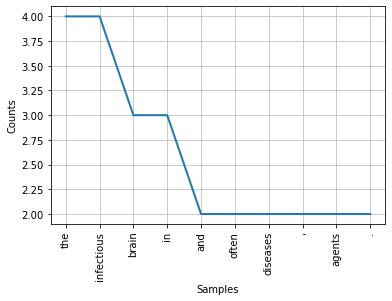

In [ ]:
import matplotlib.pyplot as plt

dist.plot(10, cumulative=False)

## Frequency Distribution for Bigrams

In [ ]:
from nltk import ngrams

In [ ]:
list(ngrams(tokens,2))

[('the', 'nervous'),
 ('nervous', 'system'),
 ('system', 'and'),
 ('and', 'brain'),
 ('brain', 'function'),
 ('function', 'do'),
 ('do', 'not'),
 ('not', 'often'),
 ('often', 'associate'),
 ('associate', 'with'),
 ('with', 'infectious'),
 ('infectious', 'diseases'),
 ('diseases', ','),
 (',', 'but'),
 ('but', 'numerous'),
 ('numerous', 'infectious'),
 ('infectious', 'agents'),
 ('agents', 'affect'),
 ('affect', 'the'),
 ('the', 'brain'),
 ('brain', 'and'),
 ('and', 'peripheral'),
 ('peripheral', 'neurons'),
 ('neurons', 'in'),
 ('in', 'deleterious'),
 ('deleterious', 'ways'),
 ('ways', '.'),
 ('.', 'infectious'),
 ('infectious', 'agents'),
 ('agents', 'often'),
 ('often', 'behave'),
 ('behave', 'differently'),
 ('differently', 'in'),
 ('in', 'the'),
 ('the', 'brain'),
 ('brain', 'than'),
 ('than', 'in'),
 ('in', 'the'),
 ('the', 'circulation'),
 ('circulation', 'or'),
 ('or', 'other'),
 ('other', 'organs'),
 ('organs', ','),
 (',', 'complicating'),
 ('complicating', 'matters'),
 ('matt

In [ ]:
bi_dist=FreqDist(ngrams(tokens,2))
bi_dist

FreqDist({('infectious', 'diseases'): 2, ('infectious', 'agents'): 2, ('the', 'brain'): 2, ('in', 'the'): 2, ('the', 'nervous'): 1, ('nervous', 'system'): 1, ('system', 'and'): 1, ('and', 'brain'): 1, ('brain', 'function'): 1, ('function', 'do'): 1, ...})

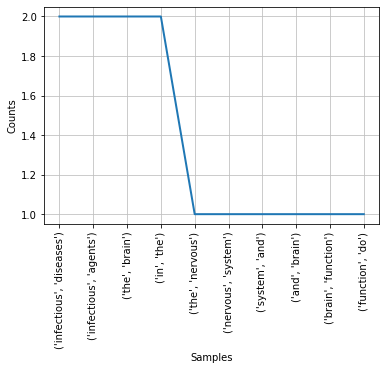

In [ ]:
bi_dist.plot(10)

## Removing Stopwords and Punctuations

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop=list(stopwords.words("english"))

print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import string

punc=list(string.punctuation)

print(punc)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
print(stop+punc)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
filtered_tokens=[]
# Filtering stopwords and punctuations
for token in tokens:
    if token not in stop+punc:
        filtered_tokens.append(token)
    else:
        print(token)

the
and
do
not
with
,
but
the
and
in
.
in
the
than
in
the
or
other
,
for
to
.


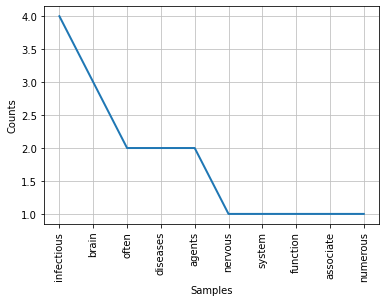

In [ ]:
FreqDist(filtered_tokens).plot(10)

## Lexicon Normalization :Stemming and Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "unconnected"

print("Lemmatized Word:",lem.lemmatize(word,"v"))

print("Stemmed Word:",stem.stem(word))

Lemmatized Word: unconnected
Stemmed Word: unconnect


## PoS Tag

In [ ]:
from nltk import pos_tag

list(dict(pos_tag(tokens)).values()).count('JJ')

7

In [ ]:
pos_tag(tokens)

[('the', 'DT'),
 ('nervous', 'JJ'),
 ('system', 'NN'),
 ('and', 'CC'),
 ('brain', 'NN'),
 ('function', 'NN'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('often', 'RB'),
 ('associate', 'JJ'),
 ('with', 'IN'),
 ('infectious', 'JJ'),
 ('diseases', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('numerous', 'JJ'),
 ('infectious', 'JJ'),
 ('agents', 'NNS'),
 ('affect', 'VBP'),
 ('the', 'DT'),
 ('brain', 'NN'),
 ('and', 'CC'),
 ('peripheral', 'JJ'),
 ('neurons', 'NNS'),
 ('in', 'IN'),
 ('deleterious', 'JJ'),
 ('ways', 'NNS'),
 ('.', '.'),
 ('infectious', 'JJ'),
 ('agents', 'NNS'),
 ('often', 'RB'),
 ('behave', 'VBP'),
 ('differently', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('brain', 'NN'),
 ('than', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('circulation', 'NN'),
 ('or', 'CC'),
 ('other', 'JJ'),
 ('organs', 'NNS'),
 (',', ','),
 ('complicating', 'VBG'),
 ('matters', 'NNS'),
 ('for', 'IN'),
 ('scientists', 'NNS'),
 ('working', 'VBG'),
 ('to', 'TO'),
 ('stop', 'VB'),
 ('neurotropic', 'RB'),
 ('infectious', 'JJ'),


## Named Entities Recognition

In [ ]:
from nltk import ne_chunk

sent="New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases."

In [ ]:
pos_tag(word_tokenize(sent))

[('New', 'NNP'),
 ('York', 'NNP'),
 ('City', 'NNP'),
 ('on', 'IN'),
 ('Tuesday', 'NNP'),
 ('declared', 'VBD'),
 ('a', 'DT'),
 ('public', 'JJ'),
 ('health', 'NN'),
 ('emergency', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('mandatory', 'JJ'),
 ('measles', 'NNS'),
 ('vaccinations', 'NNS'),
 ('amid', 'IN'),
 ('an', 'DT'),
 ('outbreak', 'NN'),
 (',', ','),
 ('becoming', 'VBG'),
 ('the', 'DT'),
 ('latest', 'JJS'),
 ('national', 'JJ'),
 ('flash', 'NN'),
 ('point', 'NN'),
 ('over', 'IN'),
 ('refusals', 'NNS'),
 ('to', 'TO'),
 ('inoculate', 'VB'),
 ('against', 'IN'),
 ('dangerous', 'JJ'),
 ('diseases', 'NNS'),
 ('.', '.')]

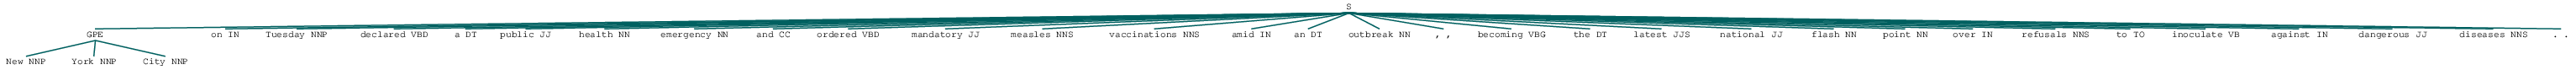

In [ ]:
ne_chunk(pos_tag(word_tokenize(sent)))

In [ ]:
for chunk in ne_chunk(pos_tag(word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label(), ' '.join(c[0] for c in chunk))

GPE New York City


## WordCloud

In [ ]:
!pip install wordcloud

/home/avinash/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/avinash/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [ ]:
text

'the nervous system and brain function do not often associate with infectious diseases, but numerous infectious agents affect the brain and peripheral neurons in deleterious ways. infectious agents often behave differently in the brain than in the circulation or other organs, complicating matters for scientists working to stop neurotropic infectious diseases.'

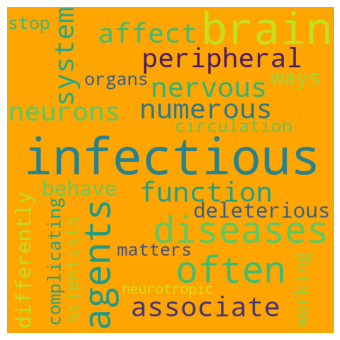

In [ ]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Import matplotlib
import matplotlib.pyplot as plt 

# Create stopword list
stopword_list = set(STOPWORDS) 

# Create WordCloud 
word_cloud = WordCloud(width = 550, height = 550, 
                       background_color ='orange', 
                       stopwords = stopword_list, 
                       min_font_size = 12).generate(text) 

# Set wordcloud figure size
plt.figure(figsize = (8, 6)) 

# Show image
plt.imshow(word_cloud) 

# Remove Axis
plt.axis("off")  

# save word cloud
plt.savefig('wordcloud.jpeg',bbox_inches='tight')

# show plot
plt.show()